Code to analyse the boundary search done in the HMS O2 computing cluster.

previous note:
I run out of disk space for those with p=10, which I am repeating as of Jan 17 2022. The rest are finished, converged and good. For p=10, it is extremely slow. After 30 days, the job that was able to run more iterations run 400. As of Feb 21, I am continuing but setting convergence to 1000.

In [1]:
import sys,os
sys.path.append("../bin")
from import_paths import path_to_eigen, path_to_utilsGRF, path_to_utilsGRF_
sys.path.append(path_to_utilsGRF_)
import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [2]:
#datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb'
datafolder='../clustersearch/'
subfolder="2021_12_13_N4MWC"
subfolder2="2021_12_13_N4MWC_scratch"
folder1=os.path.join(datafolder,subfolder)
folder2=os.path.join(datafolder,subfolder2)
print(folder1)
print(folder2)
ashapesfolder="./ashapes"
jid="45989748"
njobs=80
basename="N4MWC"

name_ashape="ashape_%s"%basename
extremespars=[[1e-3,1e3],[1e-5,1e5],[1e-7,1e7],[1e-9,1e9],[1e-10,1e10]] #copy-paste from the boundary search
absder="True" #in this case it doesn´t matter because it is monotonically increasing


../clustersearch/2021_12_13_N4MWC
../clustersearch/2021_12_13_N4MWC_scratch


In [3]:
#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok",end=",")
            else:
                print(i,np.sum(new[-1500:]))
    else:
        print(i,"!!!not enough lines")

1 ok,2 ok,3 ok,4 ok,5 !!!not long enough 104 431.0 823.0
6 ok,7 ok,8 ok,9 ok,10 !!!not long enough 117 29.0 914.0
11 ok,12 ok,13 ok,14 ok,15 !!!not long enough 84 906.0 906.0
16 ok,17 ok,18 ok,19 ok,20 !!!not long enough 83 902.0 902.0
21 ok,22 ok,23 ok,24 ok,25 !!!not long enough 101 882.0 896.0
26 ok,27 ok,28 ok,29 ok,30 !!!not long enough 99 973.0 973.0
31 ok,32 ok,33 ok,34 ok,35 !!!not long enough 69 888.0 888.0
36 ok,37 ok,38 ok,39 ok,40 !!!not long enough 83 747.0 747.0
41 ok,42 ok,43 ok,44 ok,45 !!!not long enough 99 828.0 828.0
46 ok,47 ok,48 ok,49 ok,50 !!!not long enough 93 834.0 834.0
51 ok,52 ok,53 ok,54 ok,55 !!!not long enough 172 1.0 827.0
56 ok,57 ok,58 ok,59 ok,60 !!!not long enough 85 763.0 763.0
61 ok,62 ok,63 ok,64 ok,65 !!!not long enough 89 917.0 917.0
66 ok,67 ok,68 ok,69 ok,70 !!!not long enough 108 300.0 704.0
71 ok,72 ok,73 ok,74 ok,75 !!!not long enough 56 802.0 802.0
76 ok,77 ok,78 ok,79 ok,80 !!!not long enough 72 867.0 867.0


folder to check ../clustersearch/2021_12_13_N4MWC/tocheck_N4MWC
folders are
['../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_13', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_12', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_65', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_18', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_50', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_51', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_5', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_27', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_26', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_73', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_72', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_47', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_46', '../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_78', '../clustersearch/2021_12_13

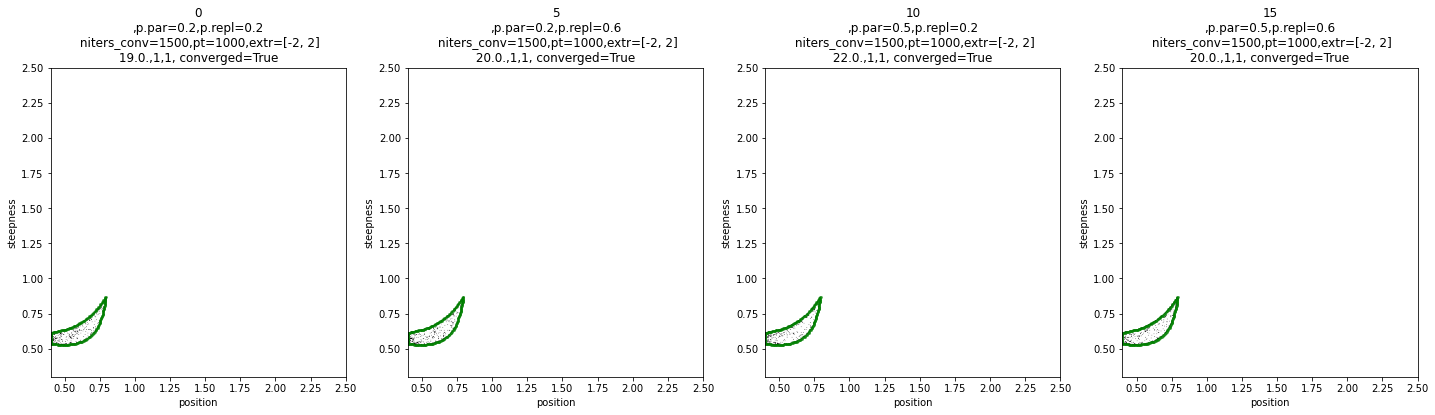

writing file to check in mat_N4MWC_20.in
jid is 25
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_25_last.npy
writing file to check in mat_N4MWC_25.in
jid is 30
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_30_last.npy
writing file to check in mat_N4MWC_30.in
jid is 35
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_35_last.npy
writing file to check in mat_N4MWC_35.in
jid is 40
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_40_last.npy


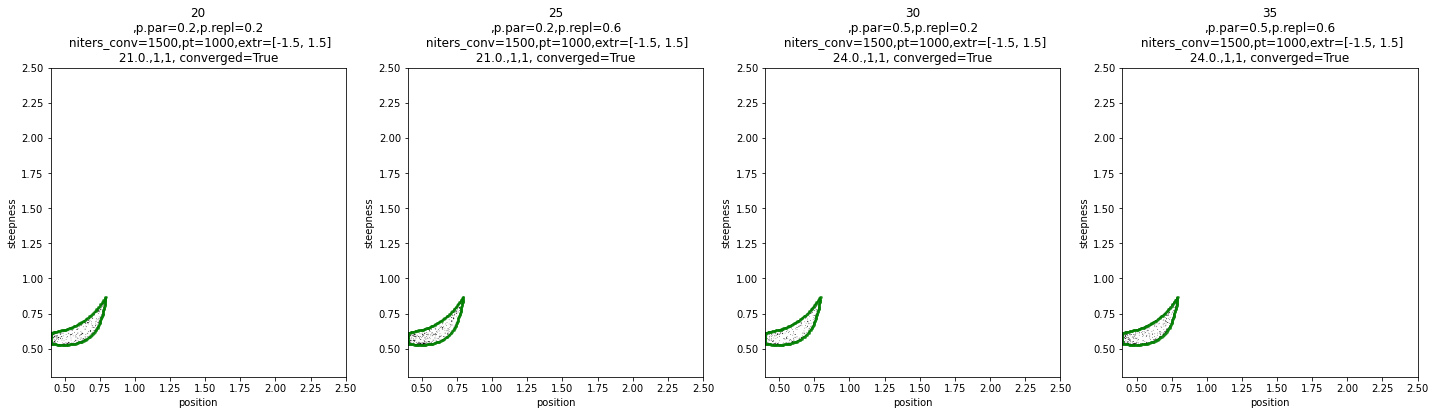

writing file to check in mat_N4MWC_40.in
jid is 45
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_45_last.npy
writing file to check in mat_N4MWC_45.in
jid is 50
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_50_last.npy
writing file to check in mat_N4MWC_50.in
jid is 55
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_55_last.npy
writing file to check in mat_N4MWC_55.in
jid is 60
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_60_last.npy


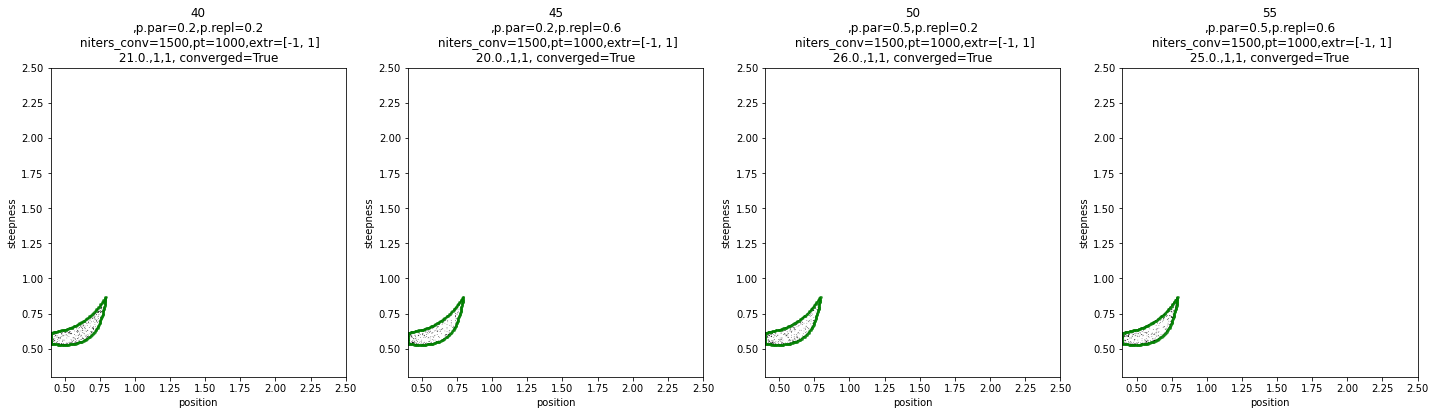

writing file to check in mat_N4MWC_60.in
jid is 65
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_65_last.npy
writing file to check in mat_N4MWC_65.in
jid is 70
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_70_last.npy
writing file to check in mat_N4MWC_70.in
jid is 75
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_75_last.npy
writing file to check in mat_N4MWC_75.in


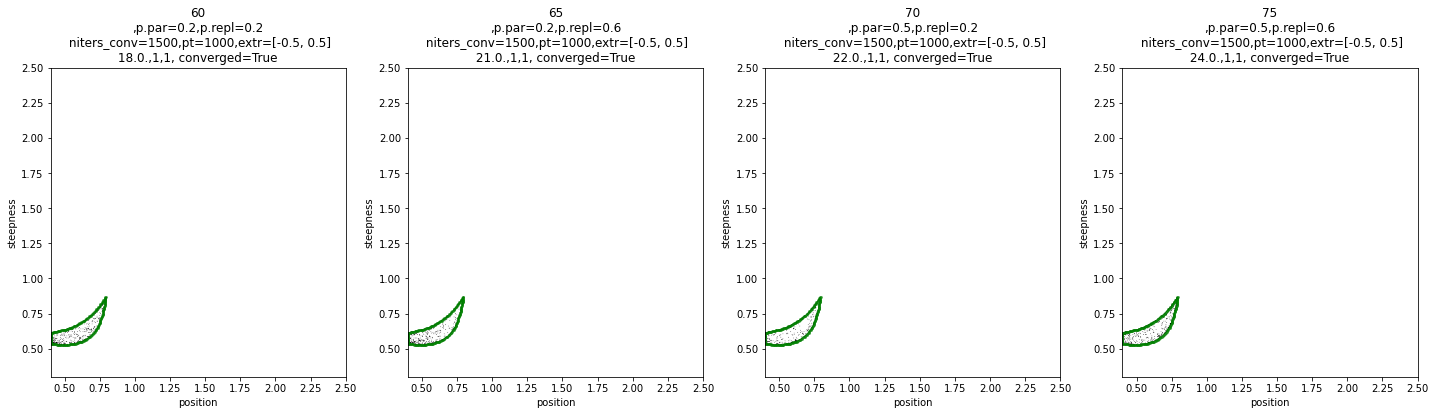

folder to check with mathematica is ../clustersearch/2021_12_13_N4MWC/tocheck_N4MWC
(441, 421)


/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared/utilsGRF/AnalyseBoundarysearch.py:410: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allpdf=pd.DataFrame(np.array(allpointslist),columns=allpointscolnames)


Processing [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76]
jid is 1
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_1_last.npy
writing file to check in mat_N4MWC_1.in
jid is 6
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_6_last.npy
writing file to check in mat_N4MWC_6.in
jid is 11
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_11_last.npy
writing file to check in mat_N4MWC_11.in
jid is 16
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_16_last.npy
writing file to check in mat_N4MWC_16.in
jid is 21
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_21_last.npy


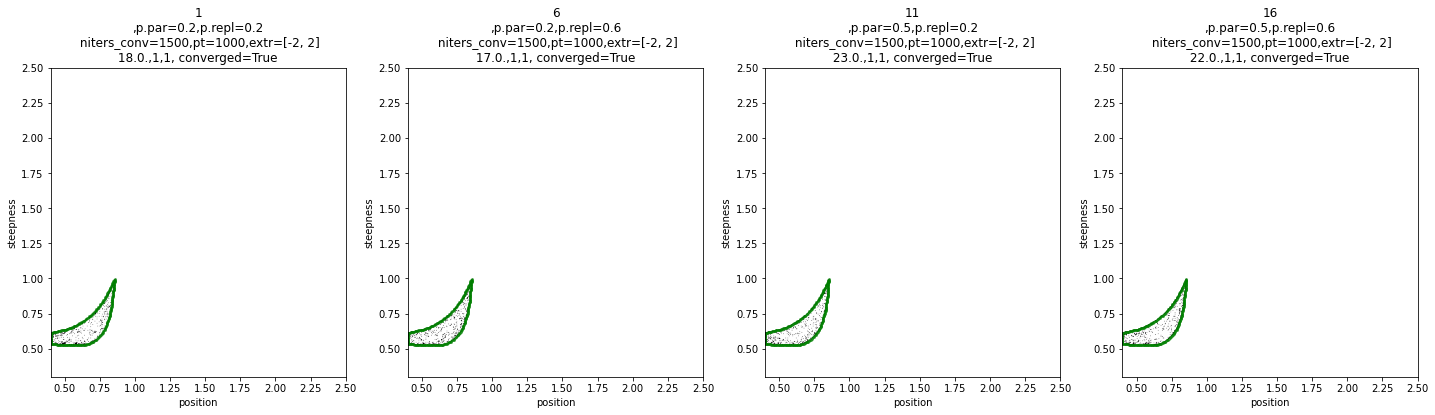

writing file to check in mat_N4MWC_21.in
jid is 26
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_26_last.npy
writing file to check in mat_N4MWC_26.in
jid is 31
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_31_last.npy
writing file to check in mat_N4MWC_31.in
jid is 36
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_36_last.npy
writing file to check in mat_N4MWC_36.in
jid is 41
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_41_last.npy


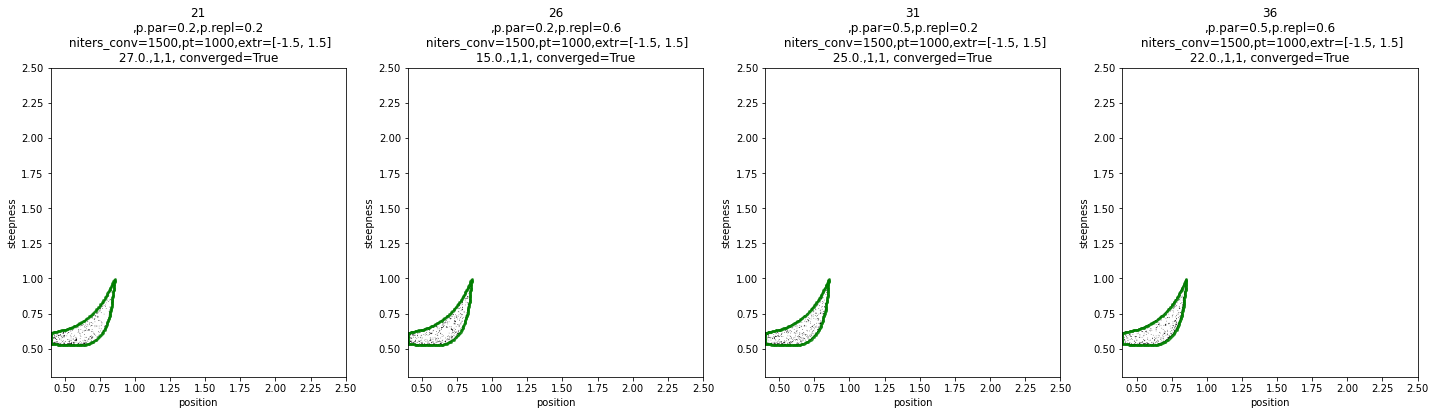

writing file to check in mat_N4MWC_41.in
jid is 46
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_46_last.npy
writing file to check in mat_N4MWC_46.in
jid is 51
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_51_last.npy
writing file to check in mat_N4MWC_51.in
jid is 56
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_56_last.npy
writing file to check in mat_N4MWC_56.in
jid is 61
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_61_last.npy


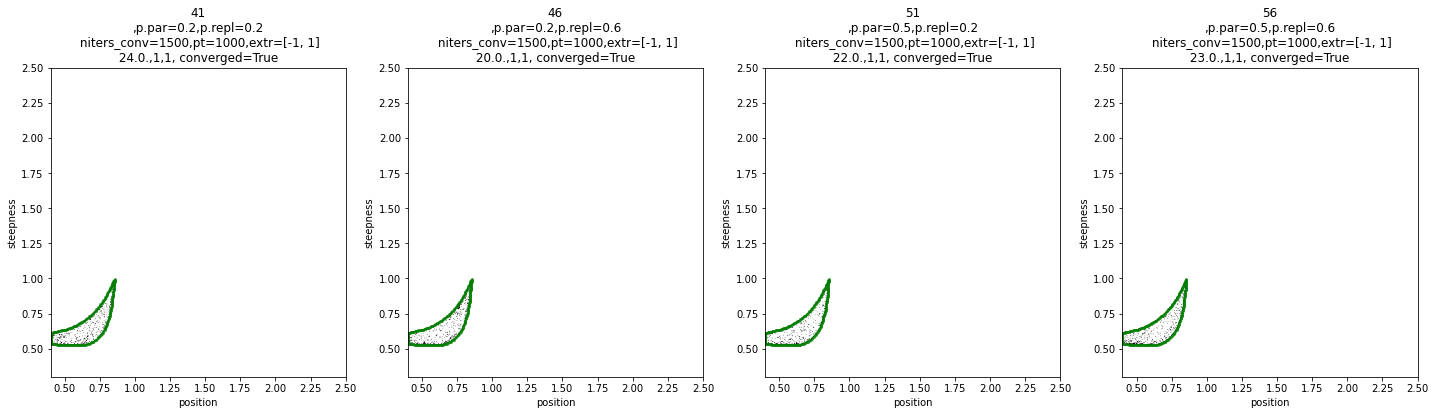

writing file to check in mat_N4MWC_61.in
jid is 66
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_66_last.npy
writing file to check in mat_N4MWC_66.in
jid is 71
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_71_last.npy
writing file to check in mat_N4MWC_71.in
jid is 76
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_76_last.npy
writing file to check in mat_N4MWC_76.in


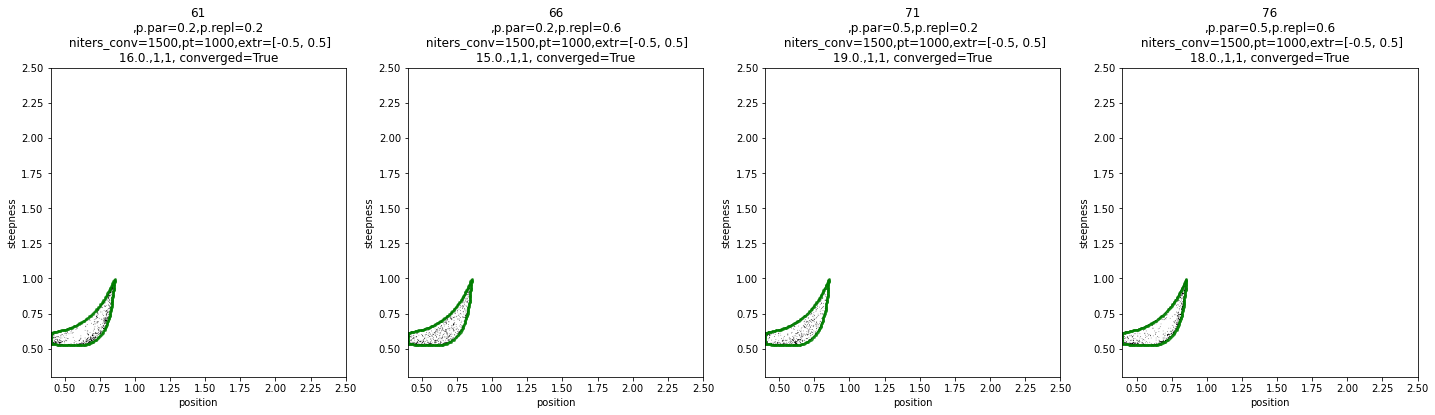

folder to check with mathematica is ../clustersearch/2021_12_13_N4MWC/tocheck_N4MWC
(441, 421)
Processing [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77]
jid is 2
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_2_last.npy
writing file to check in mat_N4MWC_2.in
jid is 7
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_7_last.npy
writing file to check in mat_N4MWC_7.in
jid is 12
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_12_last.npy
writing file to check in mat_N4MWC_12.in
jid is 17
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_17_last.npy
writing file to check in mat_N4MWC_17.in
jid is 22
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_22_last.npy


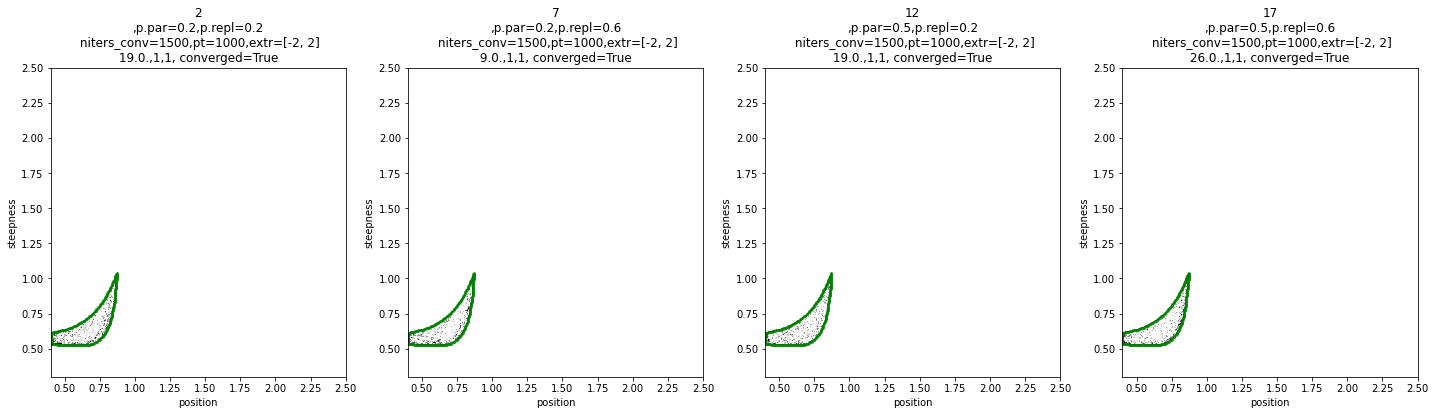

writing file to check in mat_N4MWC_22.in
jid is 27
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_27_last.npy
writing file to check in mat_N4MWC_27.in
jid is 32
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_32_last.npy
writing file to check in mat_N4MWC_32.in
jid is 37
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_37_last.npy
writing file to check in mat_N4MWC_37.in
jid is 42
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_42_last.npy


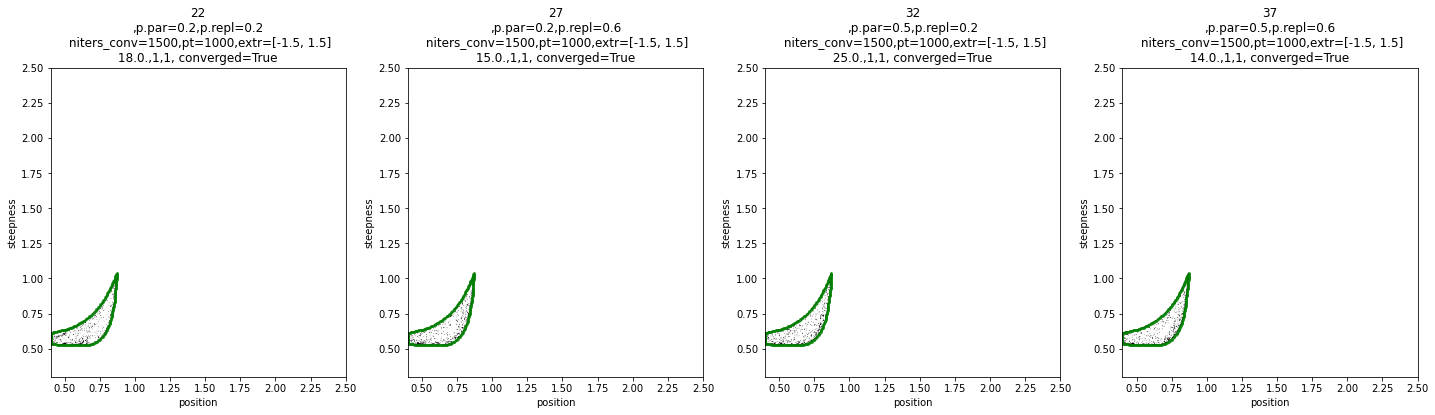

writing file to check in mat_N4MWC_42.in
jid is 47
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_47_last.npy
writing file to check in mat_N4MWC_47.in
jid is 52
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_52_last.npy
writing file to check in mat_N4MWC_52.in
jid is 57
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_57_last.npy
writing file to check in mat_N4MWC_57.in
jid is 62
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_62_last.npy


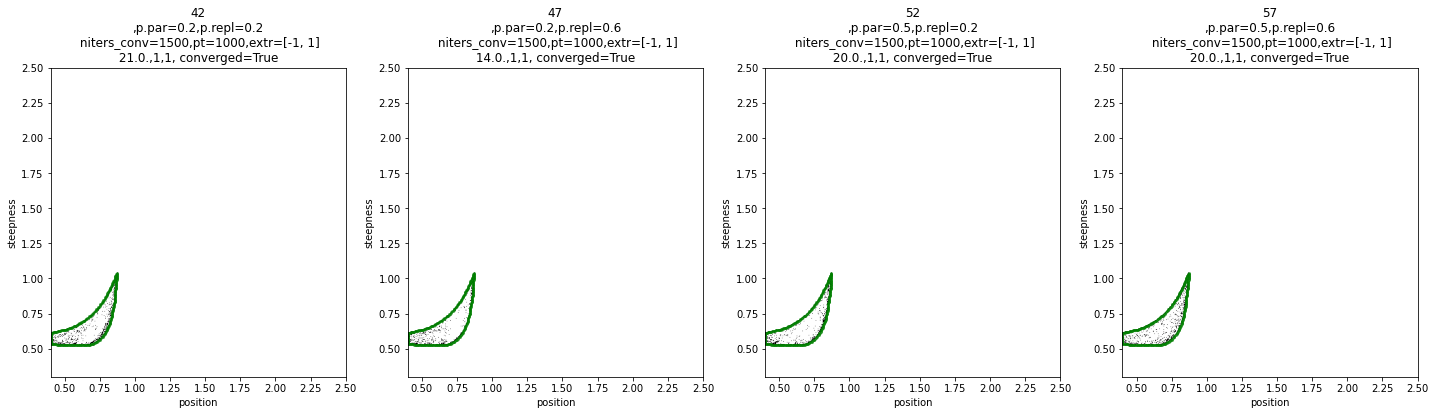

writing file to check in mat_N4MWC_62.in
jid is 67
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_67_last.npy
writing file to check in mat_N4MWC_67.in
jid is 72
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_72_last.npy
writing file to check in mat_N4MWC_72.in
jid is 77
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_77_last.npy
writing file to check in mat_N4MWC_77.in


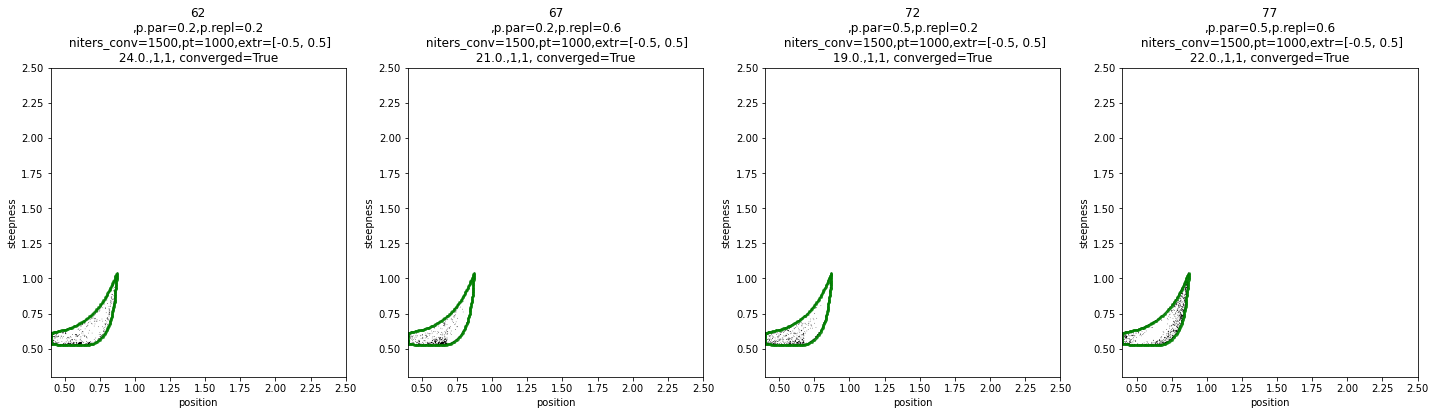

folder to check with mathematica is ../clustersearch/2021_12_13_N4MWC/tocheck_N4MWC
(441, 421)
Processing [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78]
jid is 3
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_3_last.npy
writing file to check in mat_N4MWC_3.in
jid is 8
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_8_last.npy
writing file to check in mat_N4MWC_8.in
jid is 13
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_13_last.npy
writing file to check in mat_N4MWC_13.in
jid is 18
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_18_last.npy
writing file to check in mat_N4MWC_18.in
jid is 23
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_23_last.npy


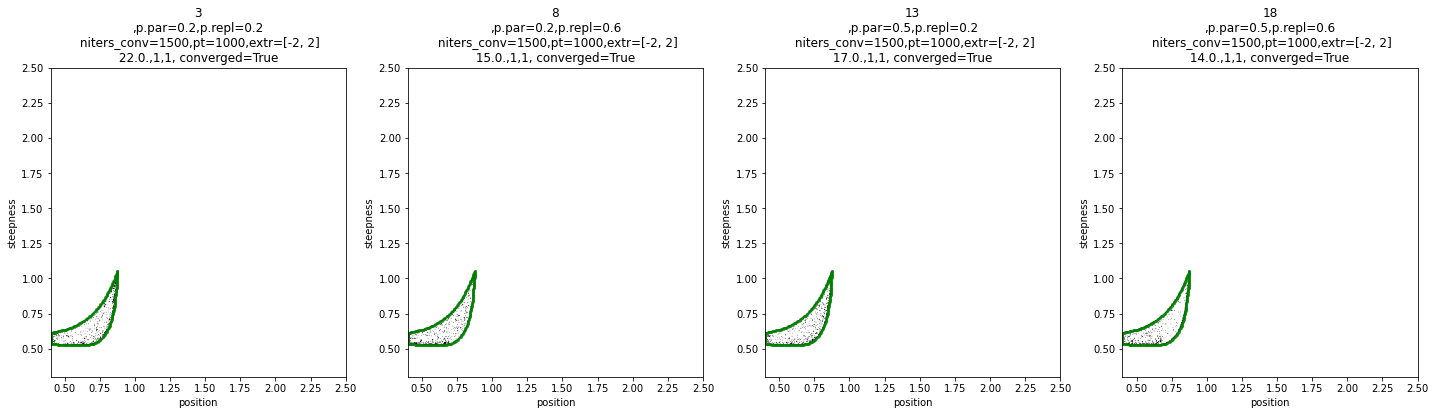

writing file to check in mat_N4MWC_23.in
jid is 28
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_28_last.npy
writing file to check in mat_N4MWC_28.in
jid is 33
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_33_last.npy
writing file to check in mat_N4MWC_33.in
jid is 38
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_38_last.npy
writing file to check in mat_N4MWC_38.in
jid is 43
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_43_last.npy


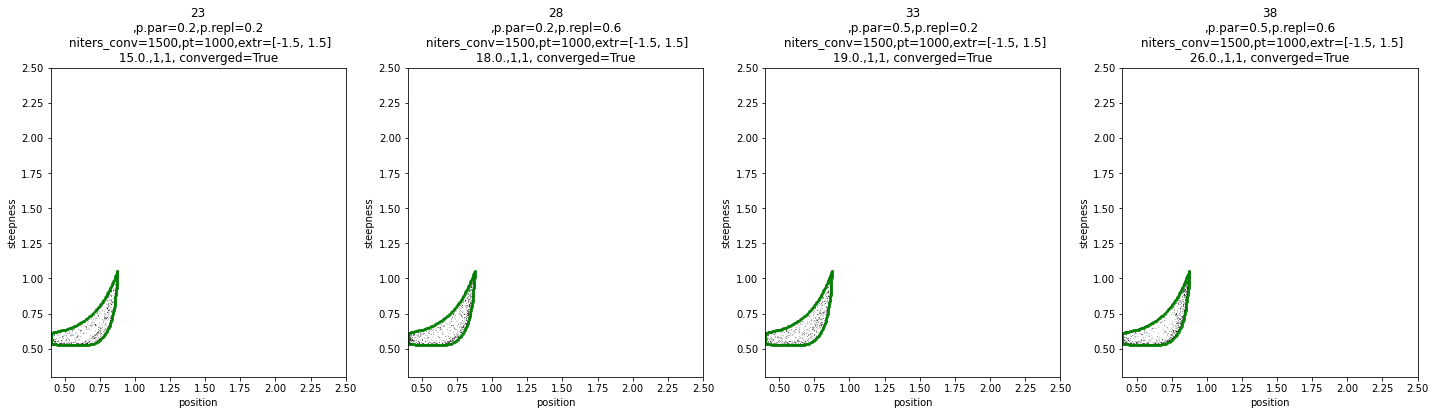

writing file to check in mat_N4MWC_43.in
jid is 48
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_48_last.npy
writing file to check in mat_N4MWC_48.in
jid is 53
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_53_last.npy
writing file to check in mat_N4MWC_53.in
jid is 58
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_58_last.npy
writing file to check in mat_N4MWC_58.in
jid is 63
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_63_last.npy


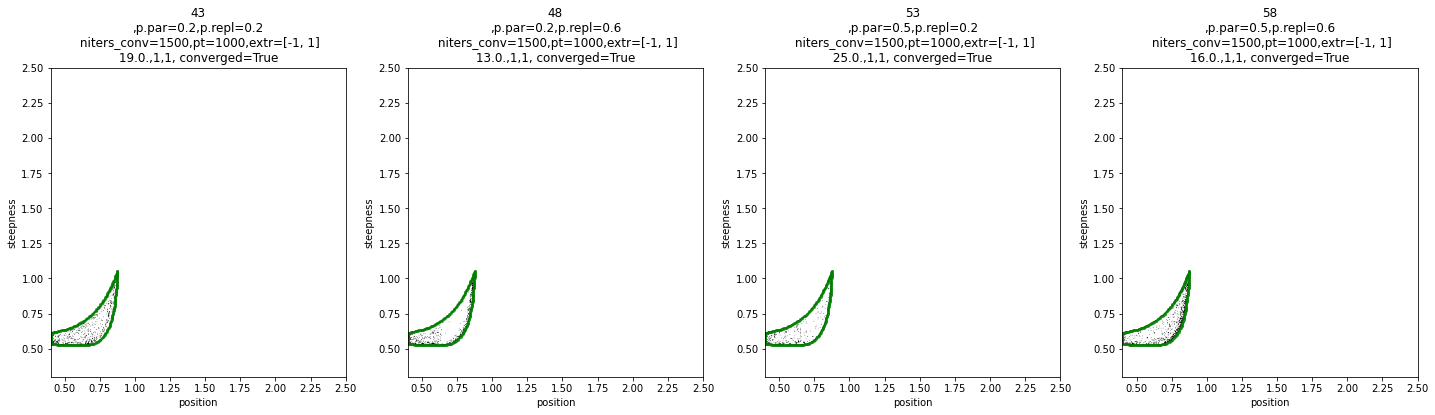

writing file to check in mat_N4MWC_63.in
jid is 68
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_68_last.npy
writing file to check in mat_N4MWC_68.in
jid is 73
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_73_last.npy
writing file to check in mat_N4MWC_73.in
jid is 78
../clustersearch/2021_12_13_N4MWC/final_results/mat_N4MWC_78_last.npy
writing file to check in mat_N4MWC_78.in


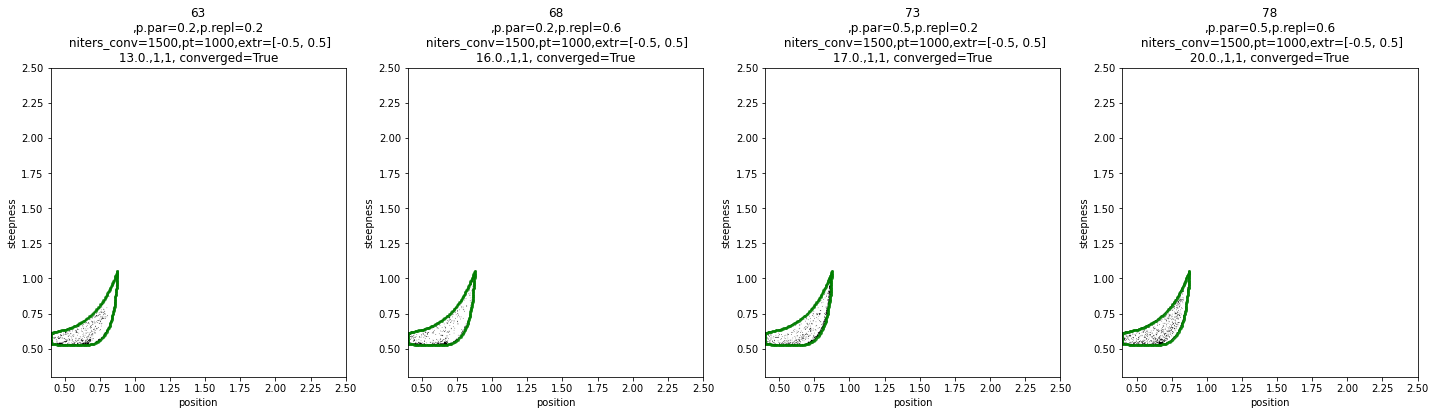

folder to check with mathematica is ../clustersearch/2021_12_13_N4MWC/tocheck_N4MWC
(441, 421)
Processing [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]
jid is 4
4 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_4
writing file to check in mat_N4MWC_4.in
jid is 9
9 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_9
writing file to check in mat_N4MWC_9.in
jid is 14
14 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_14
writing file to check in mat_N4MWC_14.in
jid is 19
19 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_19
writing file to check in mat_N4MWC_19.in
jid is 24
24 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_24


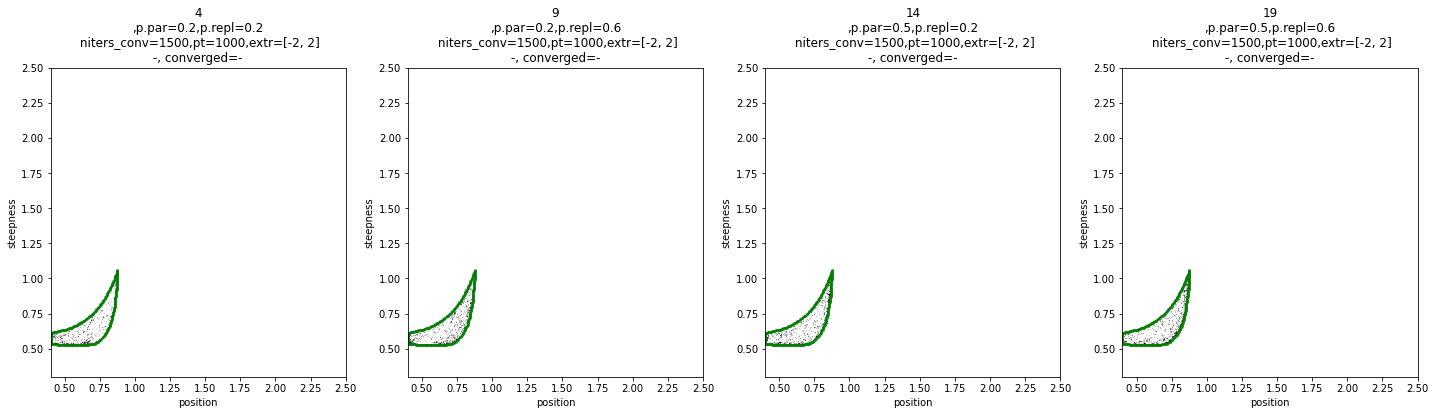

writing file to check in mat_N4MWC_24.in
jid is 29
29 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_29
writing file to check in mat_N4MWC_29.in
jid is 34
34 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_34
writing file to check in mat_N4MWC_34.in
jid is 39
39 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_39
writing file to check in mat_N4MWC_39.in
jid is 44
44 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_44


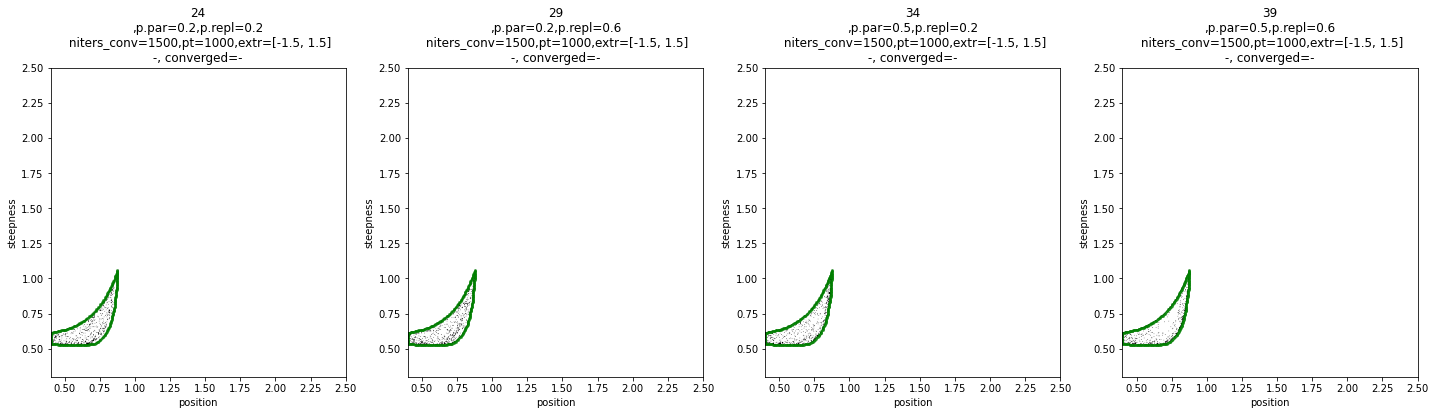

writing file to check in mat_N4MWC_44.in
jid is 49
49 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_49
writing file to check in mat_N4MWC_49.in
jid is 54
54 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_54
writing file to check in mat_N4MWC_54.in
jid is 59
59 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_59
writing file to check in mat_N4MWC_59.in
jid is 64
64 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_64


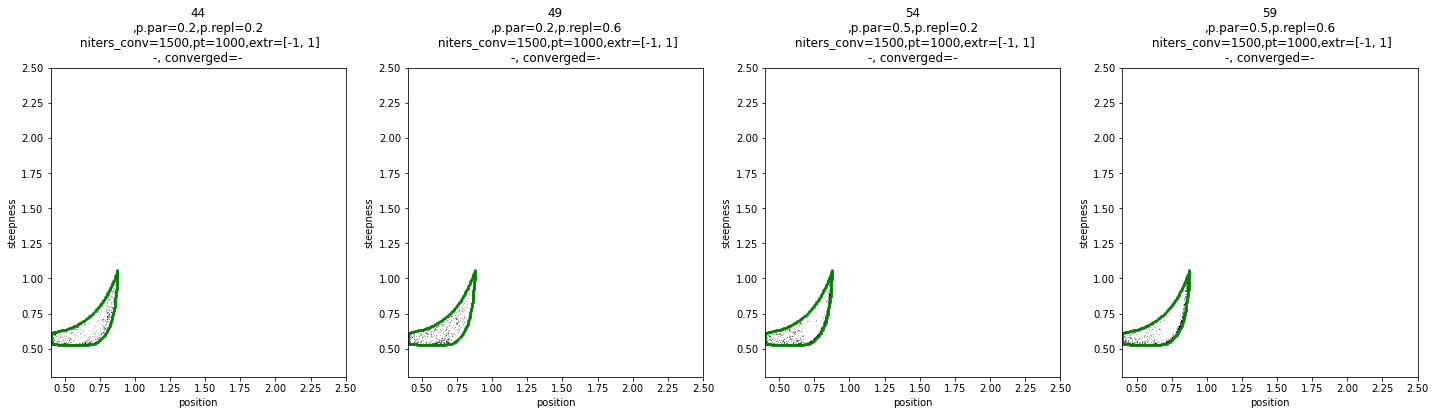

writing file to check in mat_N4MWC_64.in
jid is 69
69 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_69
writing file to check in mat_N4MWC_69.in
jid is 74
74 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_74
writing file to check in mat_N4MWC_74.in
jid is 79
79 unfinished
../clustersearch/2021_12_13_N4MWC_scratch/N4MWC_out_79
writing file to check in mat_N4MWC_79.in


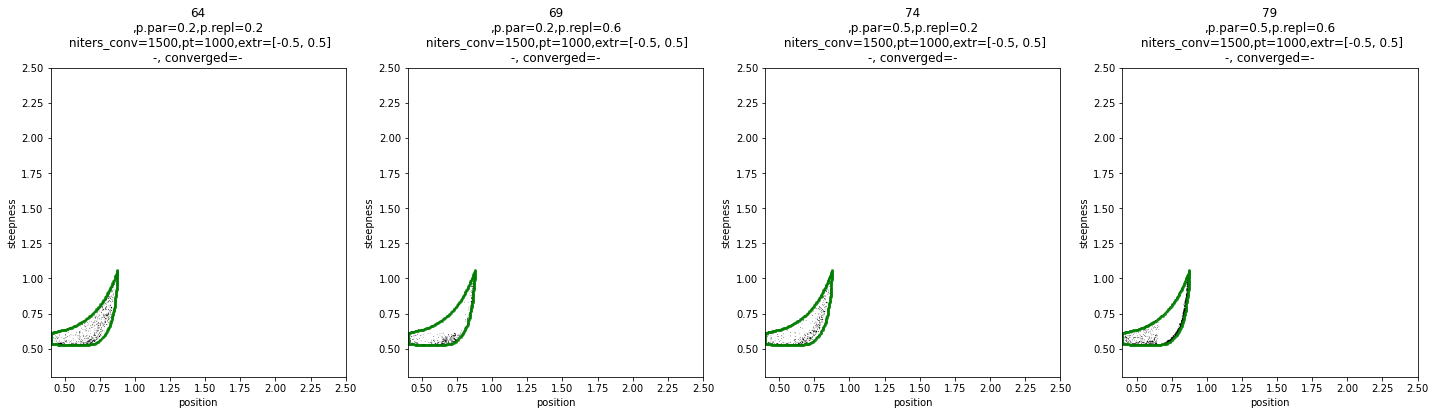

folder to check with mathematica is ../clustersearch/2021_12_13_N4MWC/tocheck_N4MWC
(441, 421)


In [4]:
processrawdata=True

#if processrawdata:
allbs=dict()
allchecks=dict()



args={'njobs':None, #in case any of the searches failed, otherwise indicate number of jobs 
      'final':True, #most jobs converged (False if the jobs were killed due to e.g. time constraints)
      'printtocheck':True,#print results to check with an alternative method or software e.g. mathematica
      'fldr':folder1,
      'basename':basename,
    'joinmats':True,
      'jid_num':jid, 
      'reference':None, 
      'xlabel':'position', 'ylabel':'steepness',
      'getallpoints':True,
     'septime':" ",
     'difparslimit':True,#True if the search was launched for different parameter ranges
     'unfinishedfolder':folder2} #indicate folder where intermediate results are saved, if final=False
results=AnalyseBoundarysearch.plot_boundaries_search(**args)
   
    


It seems that all except last parameter range are good. Let's doublecheck with mathematica:

In [5]:
checkf=results[0][1] 
#tolerance manually modified to 0.0075
print(checkf)
command="wolframscript -file ../bin/N4MWC_manualfix.wl '%s' '%s'"%(checkf,absder)  
! $command

../clustersearch/2021_12_13_N4MWC/tocheck_N4MWC
First line
absder True
starting at
../clustersearch/2021_12_13_N4MWC/tocheck_N4MWC
mat_N4MWC_0.in
mat_N4MWC_0_checked.out
Defined GRF

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,7

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,mat_N4MWC_36.in
mat_N4MWC_36_checked.out
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

limits of parameters:,0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;

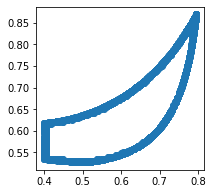

limits of parameters:,1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;

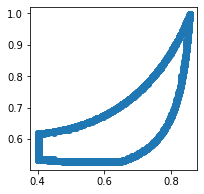

limits of parameters:,1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;

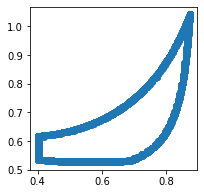

limits of parameters:,1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;1e-09 1000000000.0;

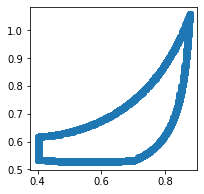

limits of parameters:,1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;1e-10 10000000000.0;

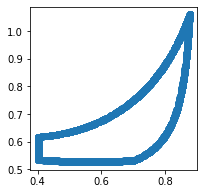

In [11]:
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

parlims_nums=[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
              [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76],
             [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77],
             [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78],
              [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]] #copy-paste from what is printed above
             
              
              
              
checked_pos_stp=[[] for x in range(len(parlims_nums))]
for plim in range(len(parlims_nums)):
    allpos=[]
    allrhos=[]
    print("limits of parameters:", end=",")
    for f in checkedfiles1:
        #print(f)
        num=int(f.split("_")[2])
        #print(f,num)
        if num in parlims_nums[plim]:
            data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
            pos=data["pos"].values
            stp=data["rho"].values
            print(data.values[:,2:].min(),data.values[:,2:].max(),end=";")
            allpos.extend(pos)
            allrhos.extend(stp)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.scatter(allpos,allrhos)
    plt.show()
    checked_pos_stp[plim]=[allpos,allrhos]
    
    

In [12]:
folder1

'../clustersearch/2021_12_13_N4MWC'

2022_8_24
[3.0, 5.0, 7.0, 9.0, 10.0]
./ashapes/ashape_N4MWC_3_2022_8_24.npy


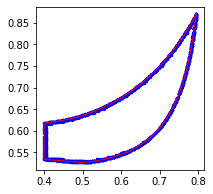

./ashapes/ashape_N4MWC_5_2022_8_24.npy


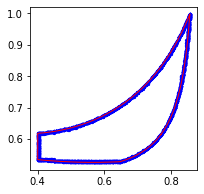

./ashapes/ashape_N4MWC_7_2022_8_24.npy


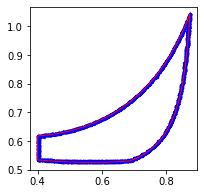

./ashapes/ashape_N4MWC_9_2022_8_24.npy


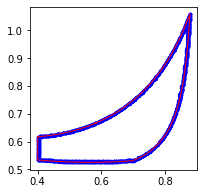

./ashapes/ashape_N4MWC_10_2022_8_24.npy


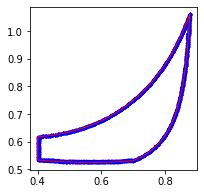

In [13]:

localt=time.localtime()
string="%d_%d_%d"%(localt[0],localt[1],localt[2])
print(string)


plims=[np.log10(x[1]) for x in extremespars]
print(plims)

for i in range(len(plims)):
    data=checked_pos_stp[i]
    allpoints=results[i][2]
    
    

    l_p=[(data[0][j],data[1][j]) for j in range(len(data[0]))] 
    alpha=10
    plt.figure(figsize=(3,3))
    plt.scatter(data[0],data[1],color="b",s=5)

    a=alphashape.alphashape(l_p,alpha=alpha)   #tweak alpha until it adapts well to the points
    namesave=os.path.join(ashapesfolder,"%s_%d_%s.npy"%(name_ashape,plims[i],string))
    print(namesave)
    plt.plot(a.exterior.xy[0],a.exterior.xy[1],color="r",linewidth=1) 
    plt.show()
    
    np.save(namesave,(a.exterior.xy)) #previous date 2022_1_17


In [14]:
def plot_hillline(ax,nmax=1):
    nrange=np.arange(1.8,nmax+0.2,0.1)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(hillline[:,0],hillline[:,1],color='gray',linestyle='--',label='Hill line')
    for n in range(2,nmax):
        ph,sh=BF.position_steepness_hill(n)
        ax.scatter(ph,sh,color='gray')
        ax.text(ph*1.01,sh*0.98,'n=%d'%n,color='gray')
    ax.legend()
    #ax.set_xlim(0.499,1.2)
    ax.set_xlabel('position')
    ax.set_ylabel('steepness')
    return ax

3.0
5.0
7.0
9.0
10.0


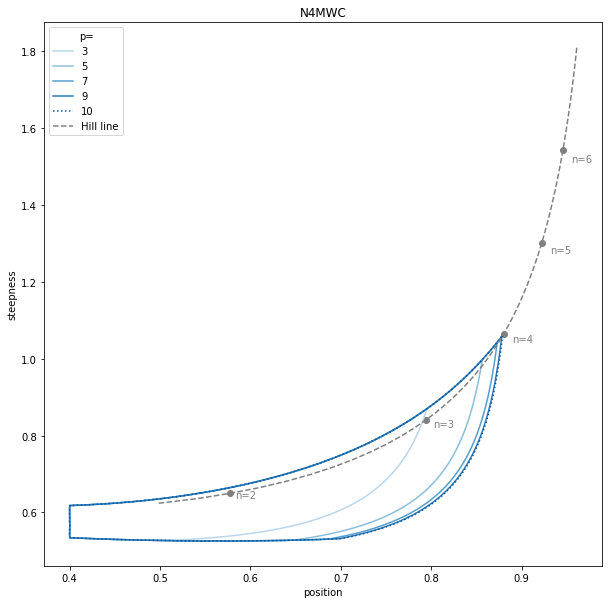

In [15]:
colors=plt.cm.Blues(np.linspace(0,1,8)[2:])
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.set_title("%s"%basename)
linestyles=["-","-","-","-",":"]
newashapes=dict()
for i in range(len(plims)):
    print(plims[i])
    date=string
    ashape=np.load(os.path.join(ashapesfolder,"%s_%d_%s.npy"%(name_ashape,plims[i],date)))
    newashapes[plims[i]]=ashape
    ax.plot(ashape[0],ashape[1],color=colors[i],label="%g"%plims[i],linestyle=linestyles[i])
    ax.set_xlabel("position")
    ax.set_ylabel("steepness")
ax=plot_hillline(ax,nmax=7)
ax.legend(title="p=")
plt.show()


It can be seen that from p=9 to p=10 the boundary changes a bit to the right but it is essentially converged.